# Case study - Telecom Churn Case study

### Problem statement
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business Goal
- In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
print(data.shape)
print(data.info())
data.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [6]:
# save original dataset as a backup
original = data.copy()

In [7]:
# list of colums 

pd.DataFrame(data.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


## Data Cleaning

In [8]:
def getMissingValues(missingCutoff):
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [9]:

def imputeNan(data,imputeColList=False,missingColList=False):
    #list of columns for which nan is to be replaced by 0.
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [10]:
# checking missing values
getMissingValues(50)

There are 40 features having more than 50% missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [11]:

# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0

imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(data,imputeCol)

In [12]:
getMissingValues(50)

There are 4 features having more than 50% missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [13]:
# dropping the columns having more than 50% missing values

missingcol = list(getMissingValues(50).index)

data.drop(missingcol,axis=1,inplace=True)
data.shape

There are 4 features having more than 50% missing values


(99999, 222)

In [14]:
# Missing values > 5%
getMissingValues(5)

There are 29 features having more than 5% missing values


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [15]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.

missingcol = list(getMissingValues(5).index)
print(len(data[data[missingcol].isnull().all(axis=1)]),missingcol)
data[data[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features having more than 5% missing values
7745 ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- there are 7745 missings values

In [16]:
imputeNan(data,missingColList=missingcol)

In [17]:
data = data[~data[missingcol].isnull().all(axis=1)]
data.shape

(99999, 222)

In [18]:
# missing values > 2%

getMissingValues(2)

There are 89 features having more than 2% missing values


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

- there are 89 features with missing values greater than 2%.

In [19]:
# checking if all these above features go missing together since they have the same 2% missing values in each feature.

missingcol = list(getMissingValues(2).index)
print(len(data[data[missingcol].isnull().all(axis=1)]),missingcol)
data[data[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features having more than 2% missing values
381 ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_i

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 381 missing values, we can drop them.

In [20]:
data = data[~data[missingcol].isnull().all(axis=1)]
data.shape

(99618, 222)

In [21]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeNan(data,missingColList=missingcol)

In [22]:
getMissingValues(0)

There are 9 features having more than 0% missing values


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [23]:
# checking for unique values in the above 9 features 

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,data[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [24]:
# Lets impute their missing values in these features with the mode.

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(data[c].value_counts())
    data[c].fillna(data[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [25]:
# missing value more than 0%

getMissingValues(0)

There are 4 features having more than 0% missing values


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [26]:
data[data['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
data[data['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
data[data['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
data[data['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [27]:
# looking at the zero columns 

zero_cols = data.columns[(data==0).all()]
print('there are {} features which has 0 as values. these features are \n{}'.format(len(zero_cols),zero_cols))

there are 11 features which has 0 as values. these features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [28]:
# looks like we can drop these zero cols since they take only one value 0.

data = data.drop(zero_cols,axis=1)

In [29]:
data.shape

(99618, 211)

In [30]:
# percentage of data left after treating and removing some of missing values.

round(data.shape[0]/99999 * 100,2)

99.62

### Fixing dtypes and column names

In [31]:
# Checking date dtypes in  the features 

data = data.reset_index(drop=True)
date_cols = list(data.filter(regex='date').columns)
print(date_cols)

# Converting date columns to date and time columns 

for col in date_cols:
    data[col] = pd.to_datetime(data[col], format='%m/%d/%Y')

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


#### There are some monthly features which are not in the standard naming (_6,_7,_8,_9)

In [33]:
# changing 'jun_vbc_3g' : 'vbc_3g_6' and respectively for jul,aug,sep as 7,8,9

data = data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                     'sep_vbc_3g' : 'vbc_3g_9'})

In [34]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9' to store the value of vol_2g_mb_ + vol_3g_mb

for i in range(6,10):
    data['vol_data_mb_'+str(i)] = (data['vol_2g_mb_'+str(i)]+data['vol_3g_mb_'+str(i)]).astype(int)

### filtering high value customers
- Thoose who have recharged amount more than or equal to X, where X is 70th percentile of average recharge amount in first 2 months. 

In [35]:
recharge_cols = data.filter(regex=('count')).columns
data[recharge_cols].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating new features for average recharge amount ,total number of data recharge, total recharge data and total month recharge amount.

`Creating new feature`: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [36]:
for i in range(6,10):
    data['avg_rech_amt_'+str(i)] = round(data['total_rech_amt_'+str(i)]/data['total_rech_num_'+str(i)]+1,2)

In [37]:
imputeNan(data,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

`Creating new feature` : total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [38]:
for i in range(6,10):
    data['total_rech_num_data_'+str(i)] = (data['count_rech_2g_'+str(i)]+data['count_rech_3g_'+str(i)]).astype(int)

`Creating new feature`: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [39]:
for i in range(6,10):
    data['total_rech_amt_data_'+str(i)] = data['total_rech_num_data_'+str(i)]*data['av_rech_amt_data_'+str(i)]

`Creating new feature`: total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [40]:
for i in range(6,10):
    data['total_month_rech_'+str(i)] = data['total_rech_amt_'+str(i)]+data['total_rech_amt_data_'+str(i)]

In [41]:
data.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [42]:
# calculating the average of first 2 months for finding the high value customers 

avg_2_months = (data['total_month_rech_6']+data['total_month_rech_7'])/2

In [43]:
# setting the cutoff to 70 percentile of avg_2_months 
hv_cutoff = np.percentile(avg_2_months,70)
hv_users = data[avg_2_months >= hv_cutoff]
hv_users = hv_users.reset_index(drop=True)

In [44]:
print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/data.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


### Tagging churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

`'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'`

In [45]:
def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [46]:
hv_users['churn'] = getChurnStatus(hv_users,9)

In [47]:
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1])
                                                                                     ,hv_users.shape[0]))

print("High-value Churn Percentage : {} %".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))

There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09 %


- There are just `8.09 %` churners which indicates high data imbalance 

## EDA

In [48]:
# PLotting histogram with labels 
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='cyan', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

In [49]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set3')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column])
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON",loc='left', fontsize=12, fontweight=0,)
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month")
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [50]:

def plot_by_Churn_Mou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month",loc='left', fontsize=12, fontweight=0)
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [51]:
def plot_by_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month",loc='left', fontsize=12, fontweight=0)
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_users.groupby('churn')[colList].mean()

In [52]:
# Filtering the common monthly columns for each month

common_col = hv_users.filter(regex ='_6').columns
monthly_col = [item.strip('_6') for item in common_col]
monthly_col

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [53]:
hv_users.shape

(29906, 232)

In [54]:
# Number of columns in each month

len(monthly_col)

57

In [55]:
# total monthly columns amoung original columns

len(monthly_col) * 4

228

In [56]:
# columns other than monthly columns

hv_users.shape[1] - (len(monthly_col) * 4)

4

In [57]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

col_9_List = hv_users.filter(regex=('_9')).columns
hv_users = hv_users.drop(col_9_List,axis=1)

In [58]:
# list of all the monthly columns 6,7,8,9

all_monthly_cols = [x + s for s in ['_6','_7','_8'] for x in monthly_col]
all_monthly_cols

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [59]:
# list of column which are not monthly columns

non_monthly_cols = [col for col in hv_users.columns if col not in all_monthly_cols]
non_monthly_cols

['mobile_number', 'circle_id', 'aon', 'churn']

In [60]:
# circle id value counts

hv_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

- looks like all the values of this data are for single circle id - 109
- we can drop this circle id since it doesn't play any role in model building 

In [61]:
hv_users.drop('circle_id',axis=1,inplace=True)

In [62]:
# aon - age on network

hv_users['aon'].describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

- Minimum age on network is 180 days.
- mean age on network is 1209 days.

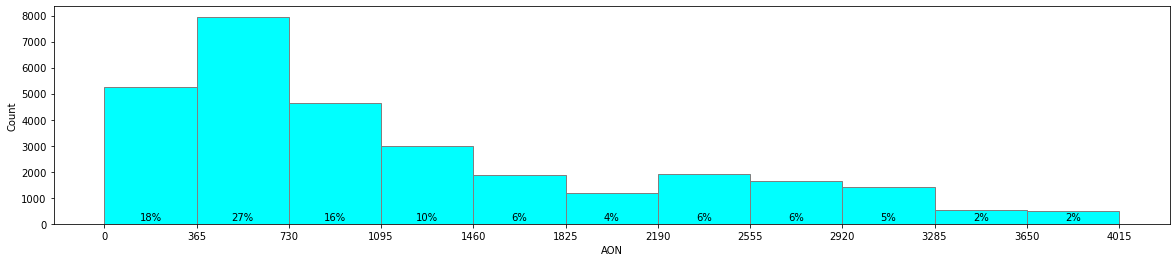

In [63]:
# bins=365, gives us the clear representaion of aon distribution yearly

plot_hist(hv_users,'aon',365)

- 27% of the HV users are in their 2nd year with the network.
- Almost 71% users have aon less than 4 years.
- 15% users are with the network from over 7 years.

In [64]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(data['aon'], range(0,data['aon'].max(),365), labels=range(0,int(round(data['aon'].max()/365))-1))

#### Incoming v/s Month

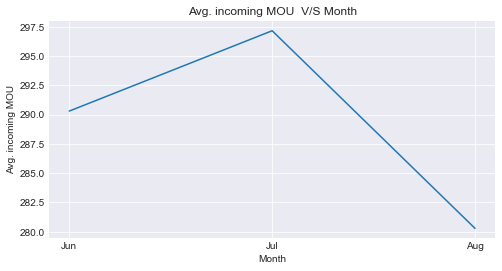

In [65]:
# Plotting Avg. total monthly incoming MOU vs month

ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)

#### Inference 
- Although the Total incoming mou avg increases from jun to july, it drops from aug lower than that for jun.

#### Outgoing v/s Month

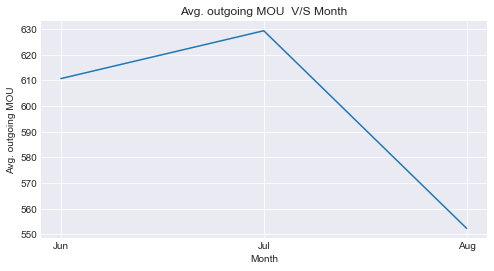

In [66]:
# Plotting Avg. total monthly outgoing MOU vs month
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)

#### Inference 
- Overall, the Avg. total outgoing usage increases  from june to july then reduces in august.

#### Incoming/Outgoing MOU VS Churn

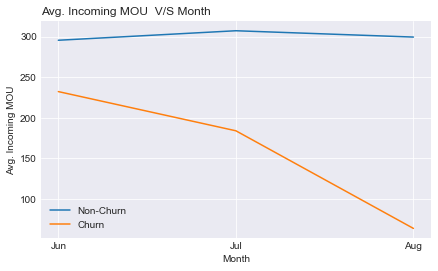

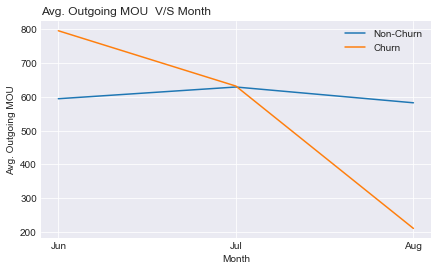

In [67]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_by_Churn_Mou(ic_col,'Incoming')
plot_by_Churn_Mou(og_col,'Outgoing')

#### Inference
- Churners Avg. Incoming/Outgoing MOU's drops drastically after the `2nd month,Jul`.
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

In [68]:
# Avg.Incoming MOU per month churn vs Non-Churn

hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [69]:
# Avg. Outgoing MOU per month churn vs Non-Churn

hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


In [70]:
# Creating a new feature loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8

for i in range(6,9):
    hv_users['loc_og_to_ic_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])/(hv_users['loc_ic_mou_'+str(i)]+1)

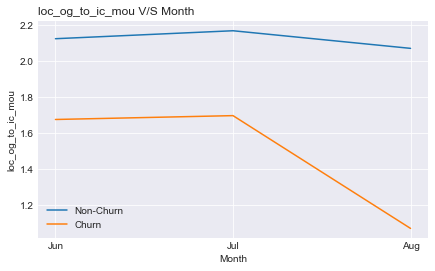

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [71]:
plot_by_Churn(hv_users,'loc_og_to_ic_mou')

#### Inference
- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.

#### Total data volume v/s Churn

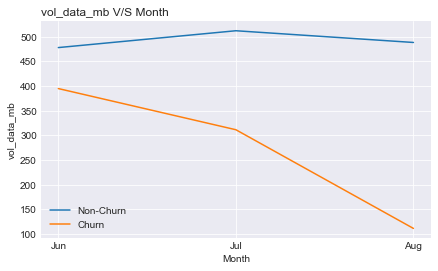

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [72]:
plot_by_Churn(hv_users,'vol_data_mb')

#### Inference

- The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

#### Total monthly rech v/s Churn

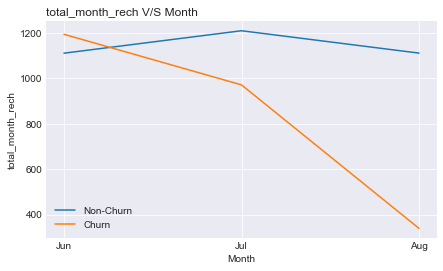

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [73]:
plot_by_Churn(hv_users,'total_month_rech')

#### Inference
- total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

#### Max_rech_amt v/s Churn

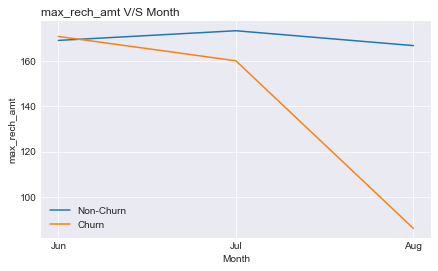

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [74]:
plot_by_Churn(hv_users,'max_rech_amt')

#### Inference
- maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

#### arpu v/s Churn

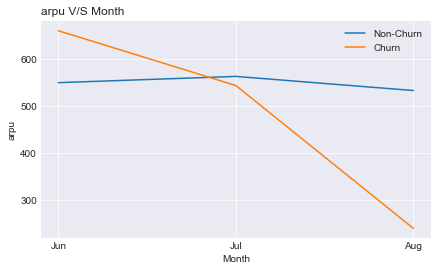

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [75]:
plot_by_Churn(hv_users,'arpu')

#### Inference 
- Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

In [76]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
for i in range(6,9):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)

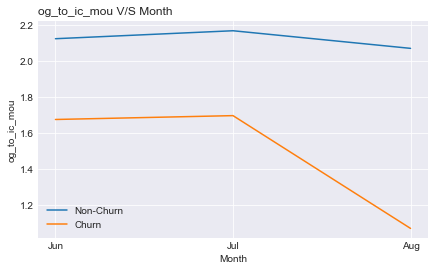

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [77]:
plot_by_Churn(hv_users,'og_to_ic_mou')

In [78]:
# Creating a new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

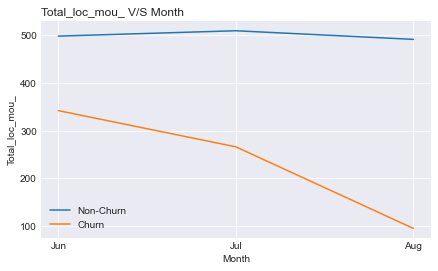

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [79]:
plot_by_Churn(hv_users,'Total_loc_mou_')

#### Inference
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This shows that people who are not making/reciving much local calls during their tenure are more likely to churn.

In [80]:
# Creating a new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])

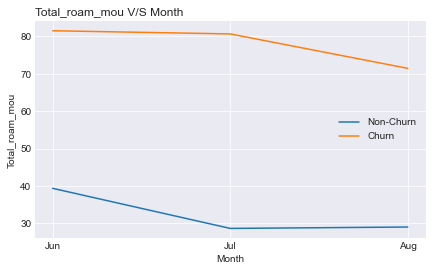

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [81]:
plot_by_Churn(hv_users,'Total_roam_mou')

#### Inference
- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.

#### last_day_rch_amt v/s Churn

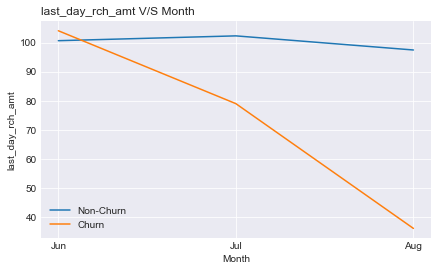

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [82]:
plot_by_Churn(hv_users,'last_day_rch_amt')

#### Inference
- we can see from above graph as the recharge amount reduces for a customer higher chances to churn.

## Modelling 

In [83]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [84]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [85]:
def get_Model_Metrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [86]:
def predict_Churn_With_Prob(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    get_Model_Metrics(y_df.churn,y_df.final_predicted)
    return y_df

In [87]:
def Optimal_Cutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [88]:
def model_fit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [89]:
# creating copy of the final hv_user dataframe
hv_usersPCA = hv_users.copy()
# removing the columns not required for modeling
hv_usersPCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [90]:
# removing the datetime columns before PCA
date_Time_Cols = list(hv_usersPCA.select_dtypes(include=['datetime64']).columns)
print(date_Time_Cols)
hv_usersPCA = hv_usersPCA.drop(date_Time_Cols, axis=1)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [91]:
X = hv_usersPCA.drop(['churn'], axis=1)
y = hv_usersPCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [92]:
scalar = MinMaxScaler()

#### Handling class imbalance 
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data.Thus, there is a high probability of misclassification of the minority class as compared to the majority class.
#### Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

#### Advantages

- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [93]:
print('Churners/label 1: {}'.format(sum(y_train==1)))
print('Non churners/label 2: {}'.format(sum(y_train==0)))
print('event rate: {}'.format(round(sum(y_train==1)/len(y_train) *100)))

Churners/label 1: 1700
Non churners/label 2: 19234
event rate: 8


In [94]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [95]:
sm = SMOTE(random_state=12,sampling_strategy=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [96]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 178)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [97]:
#Improting the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [98]:
#Doing the PCA on the train data

pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [99]:
pca.explained_variance_ratio_[:50]

array([2.95829226e-01, 1.46192497e-01, 1.01243836e-01, 7.25223889e-02,
       6.72165118e-02, 5.71229162e-02, 3.72496568e-02, 3.43330846e-02,
       3.03530312e-02, 2.45054923e-02, 1.58151119e-02, 1.49830287e-02,
       1.09550397e-02, 1.07969271e-02, 9.00458613e-03, 7.80838848e-03,
       6.58057546e-03, 5.98026363e-03, 5.55581526e-03, 4.49106364e-03,
       4.12255945e-03, 4.05242958e-03, 2.78377833e-03, 2.64044001e-03,
       2.61013252e-03, 2.41008496e-03, 2.30651769e-03, 1.79469319e-03,
       1.60554493e-03, 1.39287167e-03, 1.30481926e-03, 1.22928462e-03,
       1.19655025e-03, 1.01693350e-03, 9.53065280e-04, 8.53997074e-04,
       7.13545056e-04, 6.57323853e-04, 5.43527598e-04, 4.79870898e-04,
       4.69821861e-04, 4.25081750e-04, 3.96409885e-04, 3.83077975e-04,
       3.66881660e-04, 3.54989533e-04, 3.35914719e-04, 3.15302976e-04,
       2.95005031e-04, 2.78988655e-04])

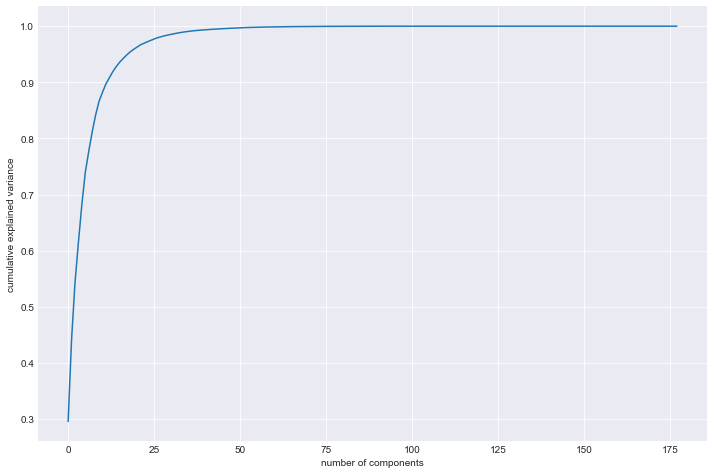

In [100]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Inference 
- looks like 25 components are enough to explain 96% of variance in dataset

In [101]:
# using incremental PCA saves lots of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [102]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 25)

In [103]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are very close to 0

max corr: 0.009996347037243523 , min corr:  -0.020660996151589523


there is no corelation between any two components, we have removed multicollinearity from our model to making it more stable to use

In [104]:
# Applying to test data

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 25)

#### for the prediciton of churn customers we will be fitting variety of models and selecting the better predicition model

### 1. Logistic Regression

In [105]:
#Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [106]:
# applying logistic regression on PC components

model_fit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8232
Recall/Sensitivity : 0.8498
AUC Score (Train): 0.891108
CV Score : Mean - 0.8905806 | Std - 0.002903338 | Min - 0.8865795 | Max - 0.8945244


In [107]:
# pred on test set

pred_probs_test = lr0.predict(X_test_pca)
get_Model_Metrics(y_test,pred_probs_test)

Roc_auc_score : 0.8216605370030772
Sensitivity/Recall : 0.8426183844011143
Specificity: 0.80070268960504
False Positive Rate: 0.19929731039496001
Positive predictive value: 0.2688888888888889
Negative Predictive value: 0.98318952692651
sklearn precision score value: 0.2688888888888889


In [108]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8040570664288899
Recall : 0.8426183844011143
Precision : 0.2688888888888889


In [109]:
#Making pred on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.89


In [110]:
cut_off_prob=0.5
y_train_df = predict_Churn_With_Prob(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8231517105126339
Sensitivity/Recall : 0.8497972340646771
Specificity: 0.7965061869605906
False Positive Rate: 0.2034938130394094
Positive predictive value: 0.8068019151981836
Negative Predictive value: 0.8413421934208358
sklearn precision score value: 0.8068019151981836


,churn,churn_Prob,final_predicted
0,0,0.637511,1
1,0,0.002936,0
2,0,0.153060,0
3,0,0.019946,0
4,0,0.816584,1


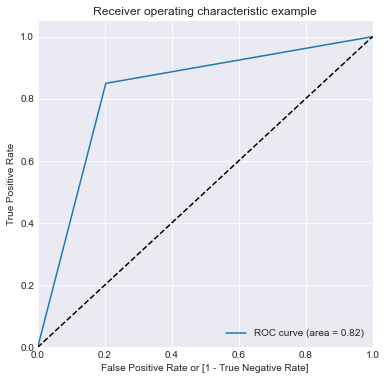

(array([0.        , 0.20349381, 1.        ]),
 array([0.        , 0.84979723, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [111]:
plot_roc(y_train_df.churn, y_train_df.final_predicted)

- looking at the ROC curve, we can say that it is a good fit as it's lying towards the left corner of plot.

In [112]:
# ROC_AUC_SCORE for y_pred_final.Churn, y_pred_final.predicted
print("roc_auc_score : {}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.8231517105126339


#### Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold, which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.661017  0.971457  0.350577
0.2   0.2  0.724914  0.952168  0.497660
0.3   0.3  0.769653  0.924561  0.614745
0.4   0.4  0.798846  0.888375  0.709317
0.5   0.5  0.823152  0.849797  0.796506
0.6   0.6  0.830820  0.794998  0.866642
0.7   0.7  0.808958  0.701674  0.916242
0.8   0.8  0.722367  0.489550  0.955184
0.9   0.9  0.586072  0.186649  0.985494


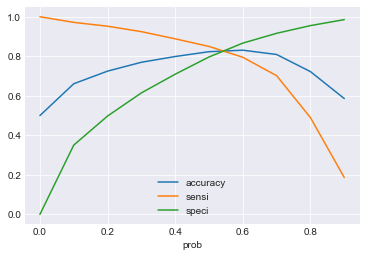

In [113]:
Optimal_Cutoff(y_train_df)

- from the above plot we can see that there's an optimal cutoff somewhere around 0.5, with a balanced specificity,senstivity and accuracy

In [114]:
# With an optimal cut-off of 0.5 on train dataset

cut_off_prob = 0.50
predict_Churn_With_Prob(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8231517105126339
Sensitivity/Recall : 0.8497972340646771
Specificity: 0.7965061869605906
False Positive Rate: 0.2034938130394094
Positive predictive value: 0.8068019151981836
Negative Predictive value: 0.8413421934208358
sklearn precision score value: 0.8068019151981836


,churn,churn_Prob,final_predicted
0,0,0.637511,1
1,0,0.002936,0
2,0,0.153060,0
3,0,0.019946,0
4,0,0.816584,1
...,...,...,...
38463,1,0.806809,1
38464,1,0.888710,1
38465,1,0.856486,1
38466,1,0.768401,1


In [115]:
# with the optimal cut-off of 0.5 on test data

predict_Churn_With_Prob(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8216605370030772
Sensitivity/Recall : 0.8426183844011143
Specificity: 0.80070268960504
False Positive Rate: 0.19929731039496001
Positive predictive value: 0.2688888888888889
Negative Predictive value: 0.98318952692651
sklearn precision score value: 0.2688888888888889


,churn,churn_Prob,final_predicted
4265,0,0.663029,1
29221,0,0.407058,0
974,0,0.402772,0
1602,0,0.338927,0
10225,0,0.101007,0
...,...,...,...
6262,0,0.397599,0
1424,0,0.079711,0
18308,0,0.246396,0
22978,0,0.043484,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

- train sensitivity :` 84.97%`, train roc auc score : `82.31%`
- test sensitivity : `84.26%`, test roc auc score : `82.16%`

### 2. Decision Tree

In [116]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
model_fit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7744
Recall/Sensitivity : 0.8083
AUC Score (Train): 0.838652
CV Score : Mean - 0.8381602 | Std - 0.01087356 | Min - 0.8214088 | Max - 0.851188


In [117]:
# pred 
pred_probs_test = dt0.predict(X_test_pca)
# checking model metrics.
get_Model_Metrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7375387505205546
Sensitivity/Recall : 0.7367688022284122
Specificity: 0.7383086988126969
False Positive Rate: 0.2616913011873031
Positive predictive value: 0.19672740795834884
Negative Predictive value: 0.9699188285850708
sklearn precision score value: 0.19672740795834884


In [118]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}

# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [119]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [120]:
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8039375339011392 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [121]:
# model with best hyperparameter
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=11,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [122]:
model_fit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8255
Recall/Sensitivity : 0.8356
AUC Score (Train): 0.908081
CV Score : Mean - 0.8852578 | Std - 0.003039495 | Min - 0.8821289 | Max - 0.8905501


In [123]:
# predictions
pred_probs_test = dt_final.predict(X_test_pca)

# checking the model metrices.
get_Model_Metrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7604698118849104
Sensitivity/Recall : 0.7214484679665738
Specificity: 0.7994911558032469
False Positive Rate: 0.20050884419675308
Positive predictive value: 0.2383801196502531
Negative Predictive value: 0.970583909398441
sklearn precision score value: 0.2383801196502531


In [124]:
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8254
           1       0.24      0.72      0.36       718

    accuracy                           0.79      8972
   macro avg       0.60      0.76      0.62      8972
weighted avg       0.91      0.79      0.84      8972



Recall rate is 72.14 by choosing best hyperparameter whcih is not so significant.

In [125]:
# checking with the optimal cut-off of 0.5

cut_off_prob = 0.5
y_train_df = predict_Churn_With_Prob(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8254653218259332
Sensitivity/Recall : 0.8355516273266091
Specificity: 0.8153790163252573
False Positive Rate: 0.18462098367474264
Positive predictive value: 0.8190296605850576
Negative Predictive value: 0.8321659768651173
sklearn precision score value: 0.8190296605850576


,churn,churn_Prob,final_predicted
0,0,0.742857,1
1,0,0.109948,0
2,0,0.008746,0
3,0,0.328125,0
4,0,0.403846,0


     prob  accuracy     sensi     speci
0.0   0.0  0.551107  1.000000  0.102215
0.1   0.1  0.708095  0.989550  0.426640
0.2   0.2  0.769445  0.965582  0.573308
0.3   0.3  0.794271  0.938702  0.649839
0.4   0.4  0.819018  0.884891  0.753145
0.5   0.5  0.825465  0.835552  0.815379
0.6   0.6  0.821202  0.780493  0.861911
0.7   0.7  0.800847  0.693408  0.908287
0.8   0.8  0.763882  0.581470  0.946293
0.9   0.9  0.681761  0.384371  0.979152


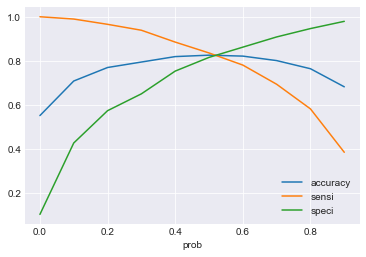

In [126]:
Optimal_Cutoff(y_train_df)

In [127]:
# On train data with a cut off = 0.4
cut_off_prob=0.4
y_train_df = predict_Churn_With_Prob(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8190184049079754
Sensitivity/Recall : 0.8848913382551731
Specificity: 0.7531454715607778
False Positive Rate: 0.2468545284392222
Positive predictive value: 0.7818816611539875
Negative Predictive value: 0.8674251497005988
sklearn precision score value: 0.7818816611539875


,churn,churn_Prob,final_predicted
0,0,0.742857,1
1,0,0.109948,0
2,0,0.008746,0
3,0,0.328125,0
4,0,0.403846,1


In [128]:
y_test_df= predict_Churn_With_Prob(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7564621323129902
Sensitivity/Recall : 0.7743732590529248
Specificity: 0.7385510055730555
False Positive Rate: 0.2614489944269445
Positive predictive value: 0.20486366985998525
Negative Predictive value: 0.9741131351869607
sklearn precision score value: 0.20486366985998525


,churn,churn_Prob,final_predicted
4265,0,0.340580,0
29221,0,0.086538,0
974,0,0.504202,1
1602,0,0.733945,1
10225,0,0.411003,1


Decision tree after selecting optimal cut-off

- Train Recall : `88.48%` and Train Roc_auc_score : `81.91%`
- Test Recall : `77.43%` and Test Roc_auc_score : `75.64%`

### 3. Random Forest 

In [129]:
# plotting accuracies with max_depth

def plot_traintestAcc(score,param):
    scores = score
    plt.figure
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [130]:
# tuning max_depth

parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score = True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

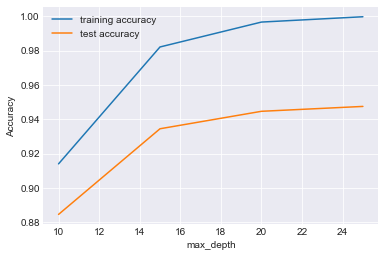

In [131]:
# plotting accuracies with max_depth

scores = rfgs.cv_results_
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Inference
- we can see the curve alomst becomes constant after max_depth=20

In [132]:
# tuning n_estimators

parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",return_train_score=True)

rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

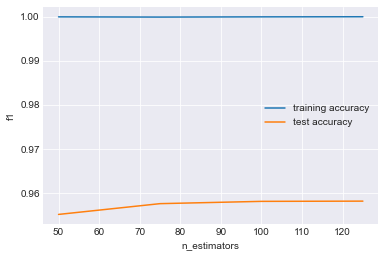

In [133]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

#### Inference
- n_estimators=80

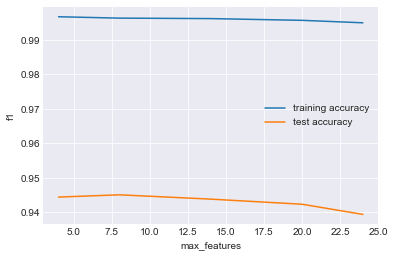

In [134]:
# tuning max_features

parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

#### Inference
- selecting max_featues = 8

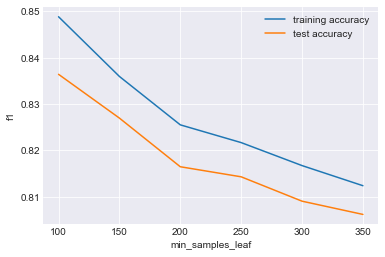

In [135]:
# Tuning min_sample_leaf

parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

#### Inference
- min_sample_leaf = 100

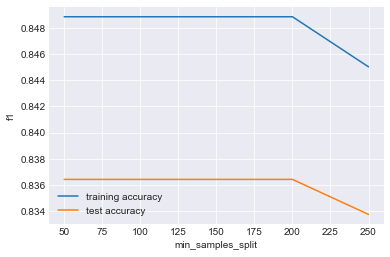

In [136]:
# min_sample_split

parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

#### Inference
- min_sample_split = 150

#### TUNED RANDOM FOREST

In [137]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=8,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

model_fit(rf_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8632
Recall/Sensitivity : 0.8563
AUC Score (Train): 0.936756
CV Score : Mean - 0.9183728 | Std - 0.003272295 | Min - 0.9141073 | Max - 0.9239458


In [138]:
# predict on test data

predictions = rf_final.predict(X_test_pca)
get_Model_Metrics(y_test,predictions)

Roc_auc_score : 0.7986005603428202
Sensitivity/Recall : 0.733983286908078
Specificity: 0.8632178337775624
False Positive Rate: 0.1367821662224376
Positive predictive value: 0.31823671497584544
Negative Predictive value: 0.9738928376161837
sklearn precision score value: 0.31823671497584544


Recall rate = `73.39%` with tuned hyper parameter

In [139]:
# churn wit default cut-off 0.5

cut_off_prob=0.5
y_train_df = predict_Churn_With_Prob(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8632109805552667
Sensitivity/Recall : 0.8563481335135698
Specificity: 0.8700738275969637
False Positive Rate: 0.12992617240303628
Positive predictive value: 0.8682656826568266
Negative Predictive value: 0.8582931582726433
sklearn precision score value: 0.8682656826568266


,churn,churn_Prob,final_predicted
0,0,0.436186,0
1,0,0.042341,0
2,0,0.156755,0
3,0,0.174468,0
4,0,0.839201,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.597120  0.999844  0.194395
0.2   0.2  0.716700  0.991525  0.441874
0.3   0.3  0.810362  0.968285  0.652438
0.4   0.4  0.854658  0.919673  0.789643
0.5   0.5  0.863211  0.856348  0.870074
0.6   0.6  0.844936  0.771238  0.918634
0.7   0.7  0.802927  0.652178  0.953676
0.8   0.8  0.725486  0.468545  0.982427
0.9   0.9  0.590985  0.183893  0.998076


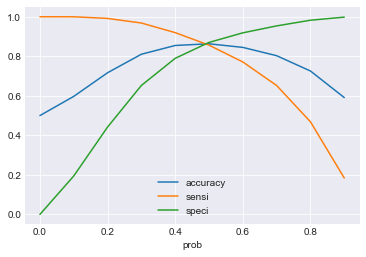

In [140]:
Optimal_Cutoff(y_train_df)

- optimal cut-off = '0.45', from above graph

In [141]:
# on train data
cut_off_prob=0.45
predict_Churn_With_Prob(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8618332120203807
Sensitivity/Recall : 0.8883227617760217
Specificity: 0.8353436622647396
False Positive Rate: 0.16465633773526048
Positive predictive value: 0.8436281044783489
Negative Predictive value: 0.8820752127367554
sklearn precision score value: 0.8436281044783489


,churn,churn_Prob,final_predicted
0,0,0.436186,0
1,0,0.042341,0
2,0,0.156755,0
3,0,0.174468,0
4,0,0.839201,1
...,...,...,...
38463,1,0.732448,1
38464,1,0.877107,1
38465,1,0.901267,1
38466,1,0.936775,1


In [142]:
# on Test data 

y_test_df= predict_Churn_With_Prob(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8053454963677609
Sensitivity/Recall : 0.7855153203342619
Specificity: 0.82517567240126
False Positive Rate: 0.17482432759874
Positive predictive value: 0.28101644245142005
Negative Predictive value: 0.9778894472361809
sklearn precision score value: 0.28101644245142005


,churn,churn_Prob,final_predicted
4265,0,0.598340,1
29221,0,0.181200,0
974,0,0.242081,0
1602,0,0.271858,0
10225,0,0.116669,0


After selecting optimal cut-off, Random Forest also is resulting in a model with
- Train Recall : `88.83%` and Train Roc_auc_score : `86.13%`
- Test Recall : `78.55%` and Test Roc_auc_score : `80.53%`

### Final preferred model
- all the models are with their respective optimal cut-off
#### 1. Logistic Regression model
- train sensitivity : `84.97%`, train roc auc score : `82.31%`.
- test sensitivity : `84.26%`, test roc auc score : `82.16%`.
#### 2. Decision Tree model
- Train Recall : `88.48%` and Train Roc_auc_score : `81.91%`.
- Test Recall : `77.43%` and Test Roc_auc_score : `75.64%`.
#### 3. Random Forest
- Train Recall : `88.83%` and Train Roc_auc_score : `86.13%`
- Test Recall : `78.55%` and Test Roc_auc_score : `80.53%`

#### Inference
- By looking at the values we can say that Logistic Regression model with optimal cut-off = 0.5, achieves best accuracy for train `84.97` and test `82.31`. 
- whereas from Tree family, Decision Tree slightly overfits data and Random Forest avoids overfit but obitained `78.55%` on Test data.

### Identifying Churn driver features.

In [143]:
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [144]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [145]:
print(grid_search.best_score_,grid_search.best_params_)

0.9050901170875548 {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [147]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=20,
                            random_state=10)

In [148]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=20, random_state=10)

<AxesSubplot:>

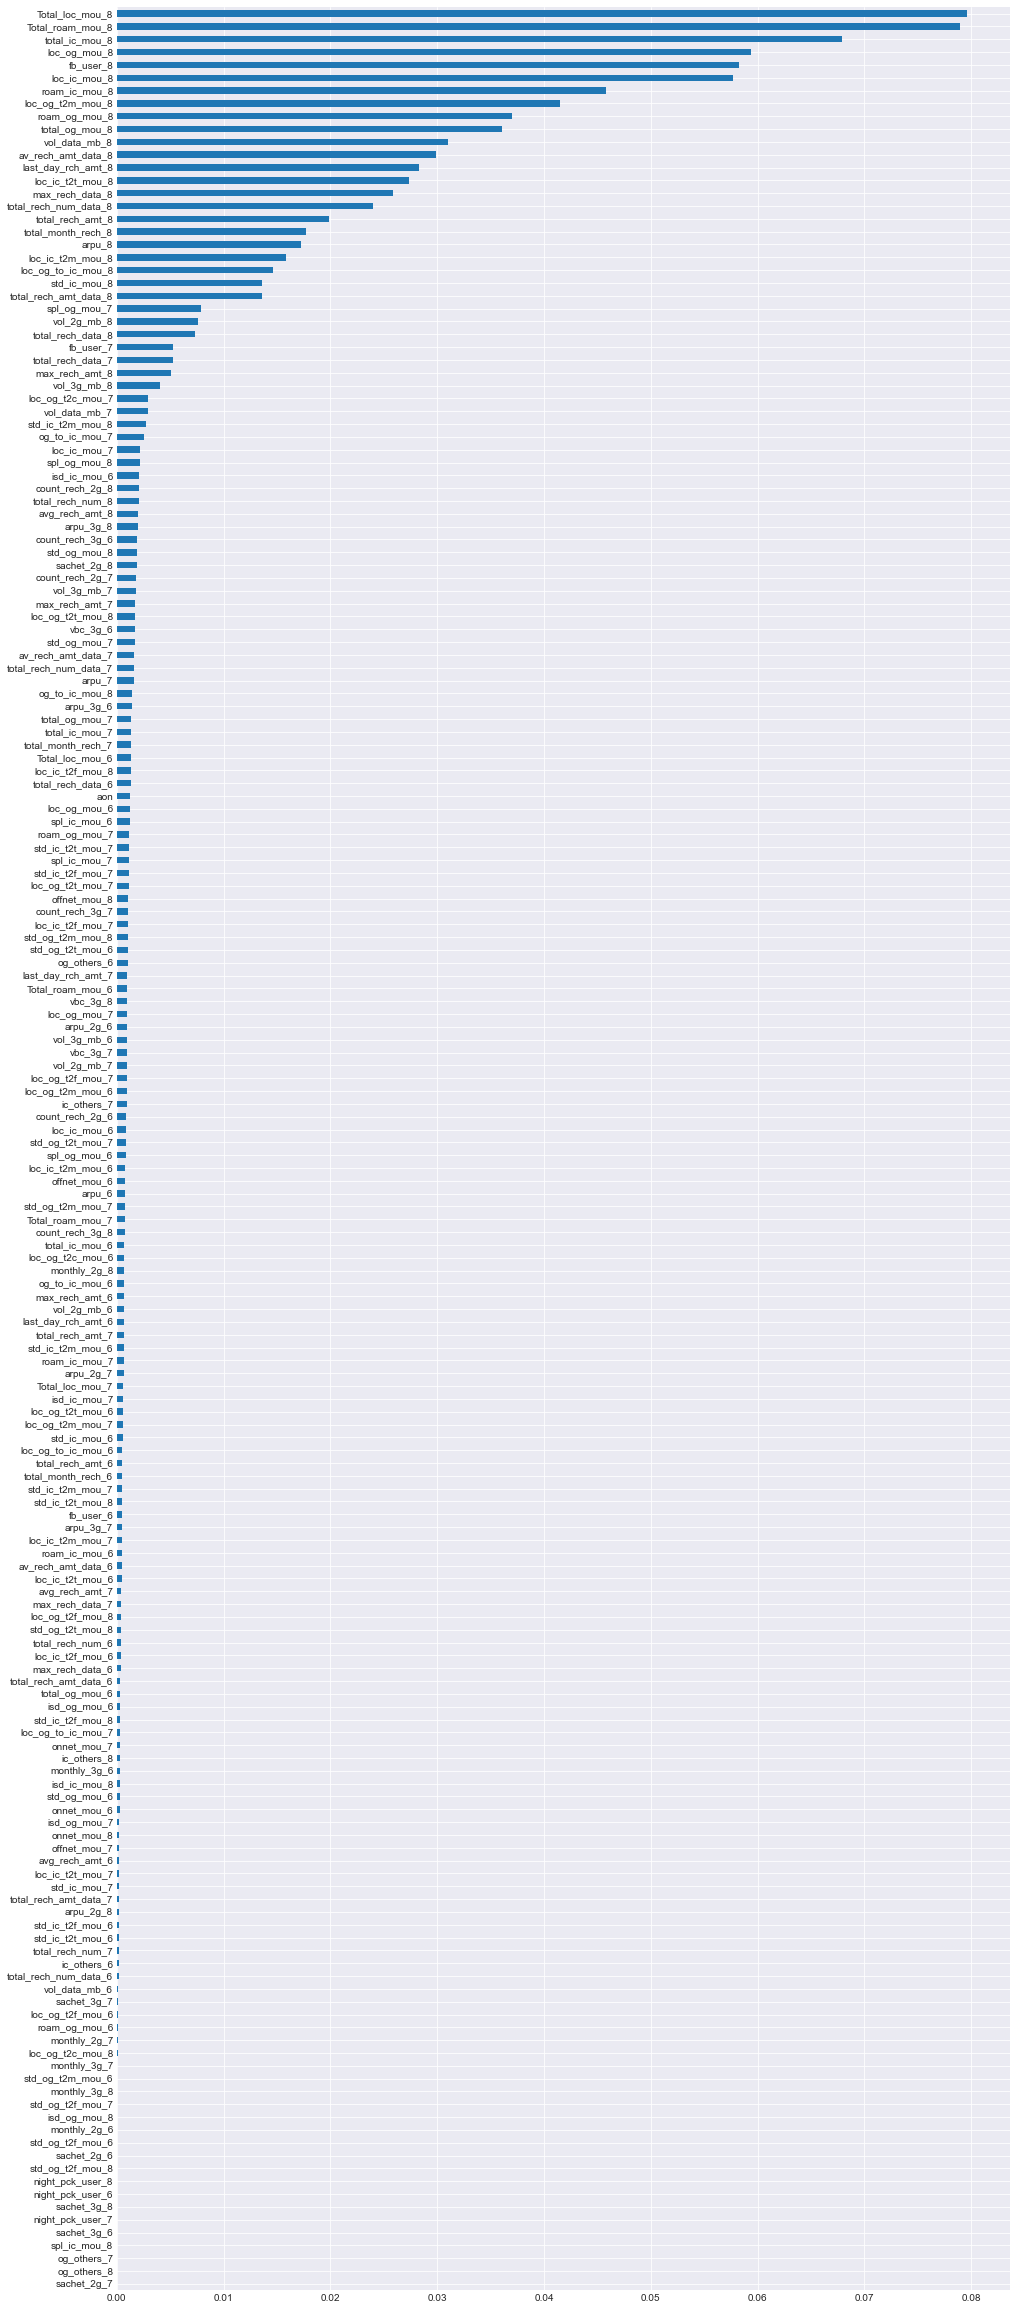

In [150]:
plt.figure(figsize=(16,42))
featur_importance = pd.Series(rf.feature_importances_, index=X.columns)
featur_importance.nlargest(len(X.columns)).sort_values().plot(kind='barh',align='center')

#### Inference 
- the graph above shows the top features ranked in order of importance as produced by random forest.
- total_ic_mou_8,total_roam_mou_8,total_ic_mou_8,ioc_og_mou_8,fb_user_8,ioc_ic_mou_8,roam_ic_mou_8,total_og_mou_8,vol_data_mb_8,av_rech_amt_data_8,last_day_rch_amt_8,ioc_ic_t2t_mou_8, etc ares some top features.
- we can clearly state that top features belonging to month 8 are in the action phase. hence, we can conclude that what happens in action phase has direct impact on customers.

## Recommendations to manage customer churn

- telecom company should pay attention to drop in MoU,APRU and data usage month over month.
- marketing team must come up with campaigns whcih targets hv_users.
#### Improving Out going services:
- initailly churner's outgoing usage was high and then gradually dropped, may be customer was unsatisfied with the tariffs on current network compared to competitors. So, company must come up with better tariffs rates than the other competitors in th e markets to retain there customers.
- Discounted outgoing rates during particular hours of the day for these customers.
- Free monthly outgoing MoU's depending on the users past roaming mou usage.
#### Improving roaming services:
- Churners have high roaming usage than non-churners.
- the Network operator must further investigate their roaming tariffs and quality of serive.
- might be that roaming rates less competitive than their competitors or customer not getting good quality of service.
- So network operator must concentrate on giving discounts and free calls based on MoU's of previous month of customer.